In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
data = pd.read_csv('city_temperature.csv', low_memory = False)
data = data[(data['Country'] == 'US')]
data = data[['State', 'City', 'Month', 'Day', 'Year', 'AvgTemperature']]
data = data[(data['Month'] == 10) & (data['Year'] >= 2007)]
data = data[~data['State'].isin(['Alaska', 'Hawaii', 'Additional Territories', 'District of Columbia'])].reset_index(drop = True)

### Train: 2007-2012 (6 yrs)
### Validation: 2013-2016 (4 yrs)
### Test: 2017-2019 (3 yrs)

In [3]:
lat_lon = pd.read_csv('all_cities_lat_lon.csv')

In [4]:
final = data.drop_duplicates().merge(lat_lon, on = ['State', 'City'])

In [5]:
final = final[~final['State'].isin(['Arizona', 'Connecticut', 'South Dakota'])].reset_index(drop = True)

In [20]:
coords = final[['Latitude', 'Longitude']].drop_duplicates().reset_index(drop = True)

In [16]:
!git clone https://github.com/joncutrer/geopandas-tutorial.git

Cloning into 'geopandas-tutorial'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 48 (delta 19), reused 39 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (48/48), 8.46 MiB | 32.69 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Updating files: 100% (15/15), done.


In [17]:
states = geopandas.read_file('geopandas-tutorial/data/usa-states-census-2014.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

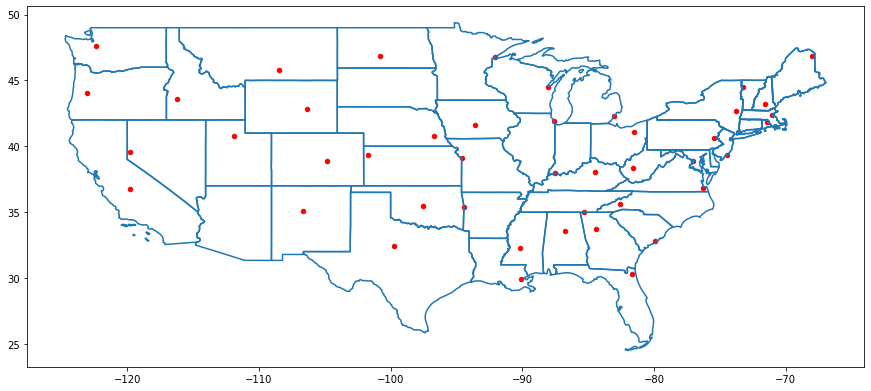

In [64]:
lo = list(coords['Longitude'])
la = list(coords['Latitude'])

fig, ax = plt.subplots(figsize = (12, 12))
fig.set_size_inches(15, 30)
states.boundary.plot(ax = ax)
geometry = [Point(xy) for xy in zip(lo,la)]
geo_df = geopandas.GeoDataFrame(geometry = geometry)
g = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = 'o',label = 'Delhi')
plt.show()

### Result visualization

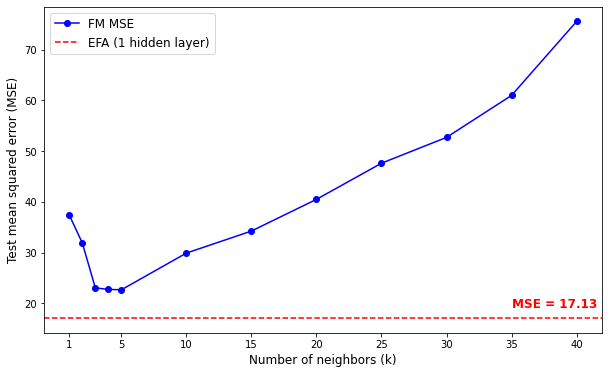

In [17]:
k_values = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
fm_mses = [37.39491271972656, 31.90117645263672, 23.062381744384766, 22.766298294067383, 22.684772491455078,
           29.91735076904297, 34.258609771728516, 40.50286865234375, 47.626365661621094, 52.71220016479492,
           60.98051834106445, 75.5508804321289]
efa_mse = 17.134693145751953  # EFA result with one hidden layer

# Plot FM results
plt.figure(figsize=(10, 6))
plt.plot(k_values, fm_mses, marker='o', label="FM MSE", color='blue')
plt.axhline(y=efa_mse, color='red', linestyle='--', label="EFA (1 hidden layer)")

# Add "MSE = 17.13" annotation
plt.text(x=max(k_values) - 5, y=efa_mse + 2, s=f"MSE = {efa_mse:.2f}", color="red", fontsize=12, fontweight="bold")

# Add labels, legend, and ticks
plt.xlabel("Number of neighbors (k)", fontsize=12)
plt.ylabel("Test mean squared error (MSE)", fontsize=12)
plt.xticks([1, 5, 10, 15, 20, 25, 30, 35, 40])
plt.legend(fontsize=12)

# Show the plot
plt.show()